## 加州房价数据集处理
**各类回归**

### 导入所需包

In [1]:
from sklearn.datasets import fetch_california_housing #加州房价数据集
from sklearn.model_selection import train_test_split, GridSearchCV #数据划分
from sklearn.preprocessing import StandardScaler #数据标准化
from sklearn import preprocessing#标准化方法

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号


#回归算法模型
from sklearn.linear_model import LinearRegression,Lasso,Ridge
# 线性回归，L1正则化，L2正则化（岭回归）
from sklearn.svm import SVR #支持向量回归
from sklearn.tree import DecisionTreeRegressor#决策树回归
from sklearn.neighbors import KNeighborsRegressor#K近邻回归
from sklearn.ensemble import RandomForestRegressor#随机森林回归

#调用指标函数
from sklearn.metrics import r2_score#计算决定系数r2
from sklearn.metrics import mean_squared_error#计算均方误差

import matplotlib.pyplot as plot
%matplotlib inline

### 数据预处理

In [2]:
# 加载数据集
california_housing = fetch_california_housing()
print(california_housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [3]:
#数据集属性描述
print("特征值：\n",california_housing.data)
print("目标值：\n",california_housing["target"])
print("特征值名字：\n",california_housing.feature_names)
print("目标值名字：\n",california_housing.target_names)
print("数据集描述：\n",california_housing.DESCR)

特征值：
 [[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
目标值：
 [4.526 3.585 3.521 ... 0.923 0.847 0.894]
特征值名字：
 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
目标值名字：
 ['MedHouseVal']
数据集描述：
 .. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute I

In [4]:
california_df = pd.DataFrame(data=california_housing.data, columns=[
    'MedInc',      # 中位收入
    'HouseAge',    # 房龄
    'AveRooms',    # 平均房间数
    'AveBedrms',   # 平均卧室数
    'Population',  # 人口
    'AveOccup',    # 平均住户人数
    'Latitude',    # 纬度
    'Longitude'    # 经度
])

In [5]:
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


### 数据划分&标准化&正则化

In [7]:
X, y = california_housing.data, california_housing.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
len(X_train),len(X_test)

(16512, 4128)

In [9]:
# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
scaler = preprocessing.StandardScaler()#标准化 Z-score
scaler.fit(X_train)

StandardScaler()

In [11]:
scaler.mean_,scaler.var_ #平均值、方差

(array([-6.59266865e-15, -6.68608149e-17,  8.01559239e-15, -1.17273358e-15,
        -2.60880895e-18, -1.13675656e-16,  7.99652724e-14, -3.87910056e-13]),
 array([1., 1., 1., 1., 1., 1., 1., 1.]))

In [12]:
# 正则化
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 单变量线性回归

In [13]:
# 选择 MedInc 和 HouseAge 两个维度
X_MedInc = california_df[['MedInc']].values
X_HouseAge = california_df[['HouseAge']].values

In [14]:
# 建立线性回归模型
linear_reg_medinc = LinearRegression()
linear_reg_houseage = LinearRegression()

In [15]:
# 分别训练模型
linear_reg_medinc.fit(X_MedInc, y)
linear_reg_houseage.fit(X_HouseAge, y)

LinearRegression()

In [16]:
# 预测房价
y_pred_medinc = linear_reg_medinc.predict(X_MedInc)
y_pred_houseage = linear_reg_houseage.predict(X_HouseAge)

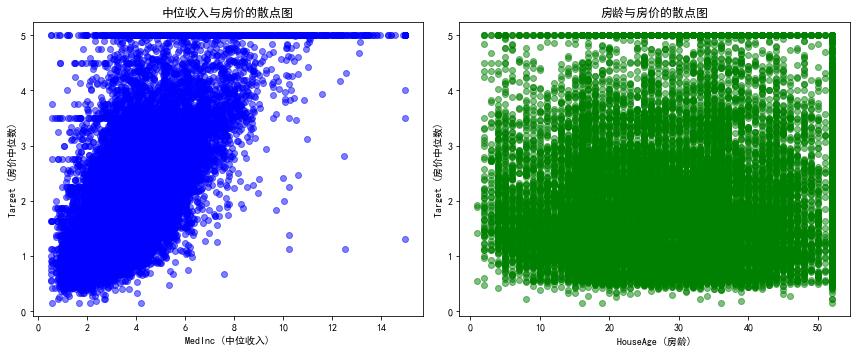

In [17]:
# 绘制散点图
plt.figure(figsize=(12, 5))

# 第一幅图：MedInc vs Target
plt.subplot(1, 2, 1)
plt.scatter(california_df['MedInc'], y, color='blue', alpha=0.5)
plt.xlabel('MedInc (中位收入)')
plt.ylabel('Target (房价中位数)')
plt.title('中位收入与房价的散点图')

# 第二幅图：HouseAge vs Target
plt.subplot(1, 2, 2)
plt.scatter(california_df['HouseAge'], y, color='green', alpha=0.5)
plt.xlabel('HouseAge (房龄)')
plt.ylabel('Target (房价中位数)')
plt.title('房龄与房价的散点图')

plt.tight_layout()
plt.show()

显然 图1 与显示出了更明显的线性关系

为其增加显示回归线

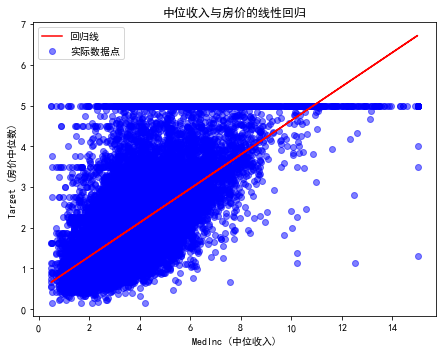

In [18]:
# 绘制加有回归线的
plt.figure(figsize=(12, 5))

# MedInc vs Target
plt.subplot(1, 2, 1)
plt.scatter(X_MedInc, y, color='blue', label='实际数据点', alpha=0.5)
plt.plot(X_MedInc, y_pred_medinc, color='red', label='回归线')
plt.xlabel('MedInc (中位收入)')
plt.ylabel('Target (房价中位数)')
plt.title('中位收入与房价的线性回归')
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()

### 多变量线性回归

In [19]:
# 用线性回归拟合
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred_lin = lr.predict(X_test) #在测试集上做预测
print("test_R2=",r2_score(y_test,y_pred_lin))
y_pre = lr.predict(X_train)#模型预测
print("train_R2=",r2_score(y_train,y_pre))

test_R2= 0.575787706032451
train_R2= 0.6125511913966952


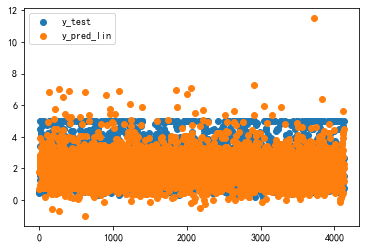

In [21]:
plot.scatter(range(len(y_test)),y_test,label="y_test")
plot.scatter(range(len(y_pred_lin)),y_pred_lin,label="y_pred_lin")
plot.legend()

### L1 正则化 - Lasso 回归
$J (  {w } ) = \frac { 1 } { 2 } \sum _ { i = 1 } ^ { m } ( h _ { w} ( x ^ { ( i ) } ) - y ^ { ( i ) } ) ^ { 2 } + \lambda \sum _ { j = 1 } ^ { n } | w _ { j } |$，此时称作`Lasso Regression` 

las.score= 0.2899759222229208
test_R2= 0.28265749823891295
train_R2= 0.2899759222229208


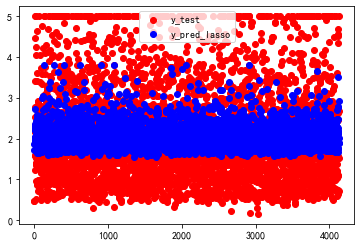

In [22]:
# 用lasso
las = Lasso(alpha=0.5)
las.fit(X_train,y_train)
print("las.score=",las.score(X_train,y_train))
y_pred_lasso = las.predict(X_test)
print("test_R2=",r2_score(y_test,y_pred_lasso))
y_pre2 = las.predict(X_train)#模型预测
print("train_R2=",r2_score(y_train,y_pre2))
plot.scatter(range(len(y_test)),y_test,c='r',label="y_test")
plot.scatter(range(len(y_pred_lasso)),y_pred_lasso,c='b',label="y_pred_lasso")
plot.legend()

### L2 正则化 - 岭回归
$J (  { w } ) = \frac { 1 } { 2 } \sum _ { i = 1 } ^ { m } ( h _ { w} ( x ^ { ( i ) } ) - y ^ { ( i ) } ) ^ { 2 } + \lambda \sum _ { j = 1 } ^ { n } w_ { j } ^ { 2 }$，此时称作`Ridge Regression`：

rid.score= 0.6125511739988105
test_R2= 0.5758017474546069
train_R2= 0.6125511739988105


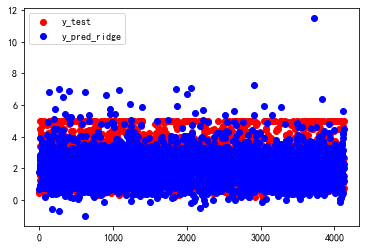

In [23]:
# 用Ridge
rid = Ridge(alpha=0.5)
rid.fit(X_train,y_train)
print("rid.score=",rid.score(X_train,y_train))
y_pred_ridge = rid.predict(X_test)
y_pred_ridge = rid.predict(X_test) #在测试集上做预测
print("test_R2=",r2_score(y_test,y_pred_ridge))
y_pre4 = rid.predict(X_train)#模型预测
print("train_R2=",r2_score(y_train,y_pre4))
plot.scatter(range(len(y_test)),y_test,c='r',label="y_test")
plot.scatter(range(len(y_pred_ridge)),y_pred_ridge,c='b',label="y_pred_ridge")
plot.legend()

### 决策树&随机森林回归

In [25]:
# 使用决策树回归模型进行训练和预测
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)  # 训练模型
y_pred_tree = tree_model.predict(X_test)  # 预测测试集

In [26]:
# 使用随机森林回归模型进行训练和预测
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)  # 训练模型
y_pred_forest = forest_model.predict(X_test)  # 预测测试集

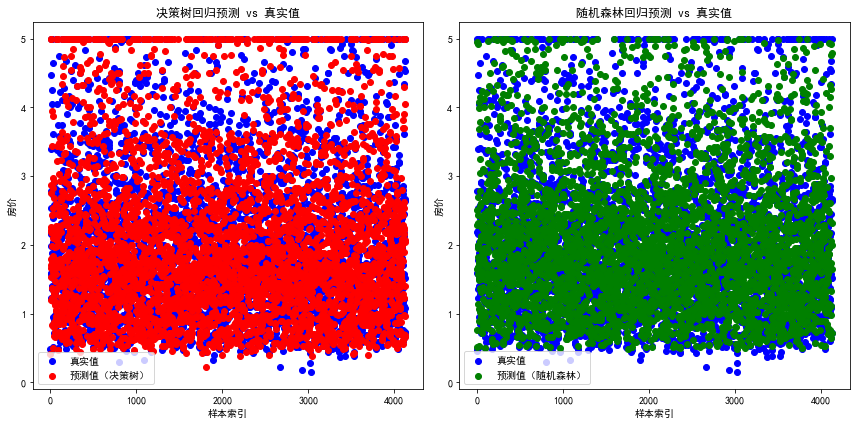

In [27]:
# 绘制真实值与决策树预测值对比图
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 左图
plt.scatter(range(len(y_test)), y_test, color='blue', label='真实值')
plt.scatter(range(len(y_pred_tree)), y_pred_tree, color='red', label='预测值（决策树）')
plt.title('决策树回归预测 vs 真实值')
plt.xlabel('样本索引')
plt.ylabel('房价')
plt.legend()

# 绘制真实值与随机森林预测值对比图
plt.subplot(1, 2, 2)  # 右图
plt.scatter(range(len(y_test)), y_test, color='blue', label='真实值')
plt.scatter(range(len(y_pred_forest)), y_pred_forest, color='green', label='预测值（随机森林）')
plt.title('随机森林回归预测 vs 真实值')
plt.xlabel('样本索引')
plt.ylabel('房价')
plt.legend()

plt.tight_layout()
plt.show()

### 批量梯度下降回归

$${{w }_{j}}:={{w }_{j}}- \alpha \frac{1}{m}\sum\limits_{i=1}^m \frac{\partial }{\partial {{w}_{j}}}J\left( w \right)$$

In [28]:
# 预处理加州房价数据
data = fetch_california_housing()
X = data.data  # 特征
y = data.target.reshape(-1, 1)  # 目标值（房价）

In [29]:
# 特征标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# 在X中加入一列全为1的偏置项
X_scaled = np.insert(X_scaled, 0, 1, axis=1)

# 初始化参数w
w = np.zeros((1, X_scaled.shape[1]))

In [31]:
# 定义代价函数（均方误差）
def computeCost(X, y, w):
    error = np.dot(X, w.T) - y
    return np.sum(np.square(error)) / (2 * len(X))

In [32]:
# 实现批量梯度下降
def batch_gradientDescent(X, y, w, alpha, iters):
    temp = np.zeros(w.shape)  # 暂存w的值
    parameters = X.shape[1]  # 参数个数（包括偏置项）
    cost = np.zeros(iters)  # 用于记录每次迭代的代价

    for i in range(iters):
        error = np.dot(X, w.T) - y  # 计算预测误差

        # 对每个参数进行更新
        for j in range(parameters):
            term = np.multiply(error, X[:, j].reshape(-1, 1))
            temp[0, j] = w[0, j] - (alpha / len(X)) * np.sum(term)

        w = temp  # 更新权重
        cost[i] = computeCost(X, y, w)  # 记录每次迭代后的代价

    return w, cost

In [33]:
# 设置学习速率和迭代次数
alpha = 0.01  # 学习速率
iters = 1000  # 迭代次数

# 训练模型
w, cost = batch_gradientDescent(X_scaled, y, w, alpha, iters)

# 输出最终的权重
print("最终的权重：", w)

最终的权重： [[ 2.06846887  0.81659877  0.17689017 -0.12729893  0.14127008  0.0166395
  -0.04392099 -0.48604502 -0.44967077]]


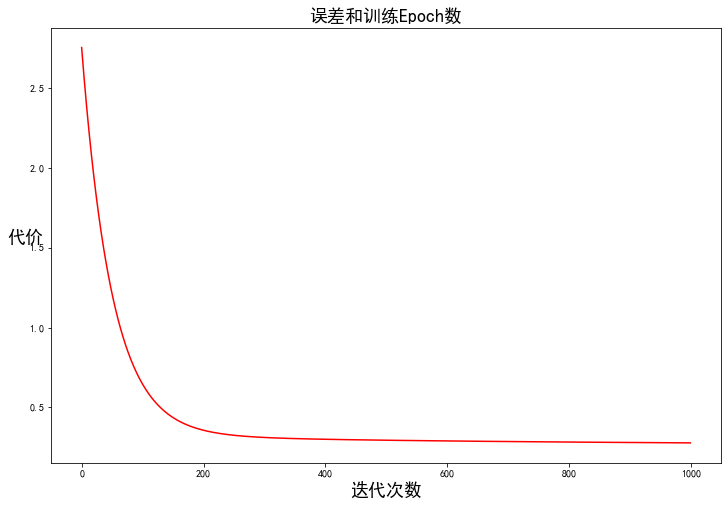

In [34]:
# 绘制代价函数的变化图
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('迭代次数', fontsize=18)
ax.set_ylabel('代价', rotation=0, fontsize=18)
ax.set_title('误差和训练Epoch数', fontsize=18)
plt.show()

### 参数调优（以随机森林为例）

In [35]:
# 调参（以随机森林为例）
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 输出最佳参数
best_forest_model = grid_search.best_estimator_
y_pred_best_forest = best_forest_model.predict(X_test)

### 模型性能比较

In [36]:
#使用均方误差（MSE）和决定系数（R²）进行评估模型，MSE 越小越好，R² 越接近 1 越好。
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}: MSE = {mse:.4f}, R² = {r2:.4f}")

evaluate_model(y_test, y_pred_lin, "线性回归")
evaluate_model(y_test, y_pred_lasso, "Lasso（L1正则化）")
evaluate_model(y_test, y_pred_ridge, "Ridge（L2正则化）")
evaluate_model(y_test, y_pred_tree, "决策树回归")
evaluate_model(y_test, y_pred_forest, "随机森林回归")
evaluate_model(y_test, y_pred_best_forest, "最佳随机森林模型")

线性回归: MSE = 0.5559, R² = 0.5758
Lasso（L1正则化）: MSE = 0.9400, R² = 0.2827
Ridge（L2正则化）: MSE = 0.5559, R² = 0.5758
决策树回归: MSE = 0.4975, R² = 0.6203
随机森林回归: MSE = 0.2566, R² = 0.8042
最佳随机森林模型: MSE = 0.2543, R² = 0.8059
